# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [82]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [83]:
aviation_cdf = pd.read_csv("./data/AviationData_Cleaned.csv")

aviation_cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18427 entries, 0 to 18426
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                18427 non-null  object 
 1   Investigation.Type      18427 non-null  object 
 2   Accident.Number         18427 non-null  object 
 3   Event.Date              18427 non-null  object 
 4   Location                18422 non-null  object 
 5   Country                 18426 non-null  object 
 6   Latitude                16480 non-null  object 
 7   Longitude               16477 non-null  object 
 8   Injury.Severity         17701 non-null  object 
 9   Aircraft.damage         17330 non-null  object 
 10  Make                    18427 non-null  object 
 11  Model                   18427 non-null  object 
 12  Number.of.Engines       16259 non-null  float64
 13  Engine.Type             15103 non-null  object 
 14  FAR.Description         18065 non-null

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [84]:
smallplanes_df = aviation_cdf[aviation_cdf['Total_Passengers'] <= 20]
largeplanes_df = aviation_cdf[aviation_cdf['Total_Passengers'] > 20]

smallplanes_df.info()
largeplanes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17510 entries, 0 to 18426
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                17510 non-null  object 
 1   Investigation.Type      17510 non-null  object 
 2   Accident.Number         17510 non-null  object 
 3   Event.Date              17510 non-null  object 
 4   Location                17506 non-null  object 
 5   Country                 17509 non-null  object 
 6   Latitude                15953 non-null  object 
 7   Longitude               15949 non-null  object 
 8   Injury.Severity         16784 non-null  object 
 9   Aircraft.damage         16839 non-null  object 
 10  Make                    17510 non-null  object 
 11  Model                   17510 non-null  object 
 12  Number.of.Engines       15649 non-null  float64
 13  Engine.Type             14585 non-null  object 
 14  FAR.Description         17222 non-null  obj

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [85]:
#Look for planes with 0 total passengers (no injuries reported)
#noinjuries_small = smallplanes_df.loc[smallplanes_df['Total_Passengers'] == 0]
#noinjuries_small

#smallplanes_df['Total.Fatal.Injuries']

#Function to calculate the sever injury rate
#def injury_calculator(row):
#    injured = row['Total.Fatal.Injuries'] + row['Total.Serious.Injuries']
#    ratio = injured / row['Total_Passengers']
#    return ratio

lp_make_list = largeplanes_df['Make'].to_list()
lp_make_unique = list(set(lp_make_list))
lp_make_unique.sort()
#print(lp_make_unique)


#largeplanes_df['Make'] = largeplanes_df['Make'].replace('AIRBUS INDUSTRIE', 'AIRBUS').str.strip()
#largeplanes_df['Make'] = largeplanes_df['Make'].replace('BOMBARDIER INC', 'BOMBARDIER').str.strip()
#largeplanes_df['Make'] = largeplanes_df['Make'].replace('DE HAVILLAND', 'DEHAVILLAND').str.strip()

#smallplanes_df['sf_injury_rate'] = smallplanes_df.apply(lambda row: (row['Total.Serious.Injuries'] + row['Total.Fatal.Injuries'])/row['Total_Passengers'], axis=1)

#largeplanes_df['sf_injury_rate'] = largeplanes_df.apply(lambda x: injury_calculator(x), axis=1)

largeplanes_grouped_sf2 = largeplanes_df.groupby('Make')['sf_injury_rate'].mean()
largeplanes_grouped_sf2 = largeplanes_grouped_sf2.sort_values()
largeplanes_grouped_sf = largeplanes_grouped_sf2.head(15)




sp_make_list = smallplanes_df['Make'].to_list()
sp_make_unique = list(set(sp_make_list))
sp_make_unique.sort()
print(len(lp_make_unique))



#smallplanes_df['sf_injury_rate'] = smallplanes_df.apply(lambda x: injury_calculator(x), axis=1)

smallplanes_grouped_sf3 = smallplanes_df.groupby('Make')['sf_injury_rate'].mean()
#print(len(smallplanes_grouped_sf2))
smallplanes_grouped_sf2 = smallplanes_grouped_sf3.sort_values()
smallplanes_grouped_sf = smallplanes_grouped_sf2.head(17)
smallplanes_grouped_sf
#smallplanes_grouped.sort_index()
len(smallplanes_grouped_sf2)


#smallplanes_df.head()
#[['Total.Fatal.Injuries','Total.Serious.Injuries']].sum(axis=1)/smallplanes_df['Total_Passengers']

#(smallplanes_df['Total.Fatal.Injuries'] + smallplanes_df['Total.Serious.Injuries']) #/ smallplanes_df['Total_Passengers']

16


50

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

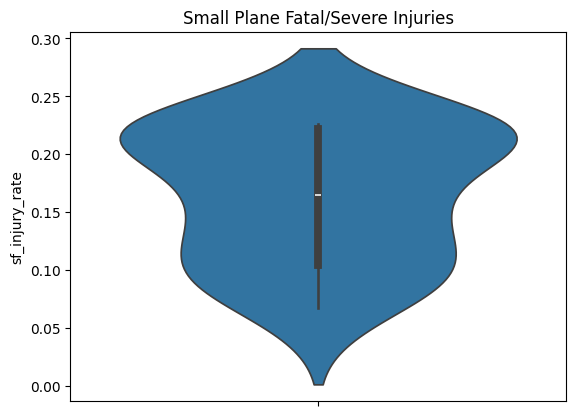

In [86]:
sns.violinplot(smallplanes_grouped_sf).set_title("Small Plane Fatal/Severe Injuries")

plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

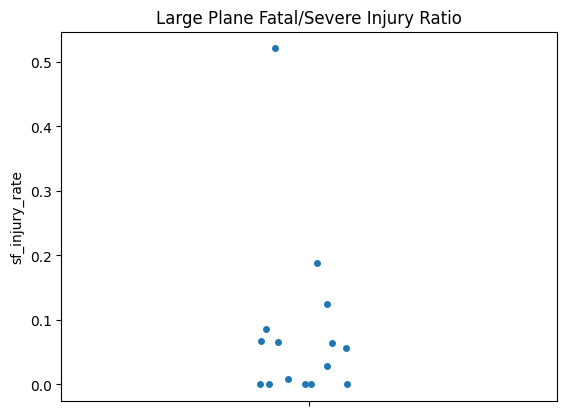

In [87]:
sns.stripplot(largeplanes_grouped_sf).set_title("Large Plane Fatal/Severe Injury Ratio")
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

C:\Users\apcas\AppData\Local\Temp\ipykernel_30500\183544486.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallplane_combined_grouped_F['Type'] = "Small"


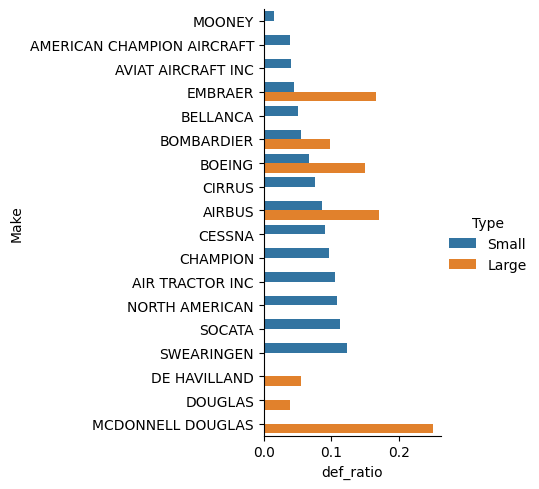

In [88]:
#smallplane_df_ir = smallplanes_df.groupby('Make')['sf_injury_rate'].mean()
#smallplane_df_ir2 = smallplane_df_ir.reset_index()
#smallplanes_df_ir = smallplane_df_ir2.sort_values(by='sf_injury_rate')
#smallplanes_df_ir.head(20)


#Filter and group large planes by make and destroyed category calculating the values for each destoryed category
#largeplane_total = largeplanes_df.groupby('Make')['Destroyed'].count()
#largeplane_total2 = largeplane_total.reset_index()
#print(largeplane_total2)



#Get the values for the Destroyed column.  Yes, No, Unk value counts and set as new DF
largeplane_destroyed = largeplanes_df.groupby(['Make','Destroyed']).size().to_frame()
largeplane_destroyed2 = largeplane_destroyed.reset_index()
largeplane_destroyed_Yes = largeplane_destroyed2[largeplane_destroyed2['Destroyed'] == 'Yes']
largeplane_destroyed_No = largeplane_destroyed2[largeplane_destroyed2['Destroyed'] == 'No']
largeplane_destroyed_Unk = largeplane_destroyed2[largeplane_destroyed2['Destroyed'] == 'Unknown']

#Change column name for created DF
largeplane_destroyed_Yes2 = largeplane_destroyed_Yes.rename(columns={0 : 'Yes'})
largeplane_destroyed_No2 = largeplane_destroyed_No.rename(columns={0 : 'No'})
largeplane_destroyed_Unk2 = largeplane_destroyed_Unk.rename(columns={0 : 'Unk'})

#Combine all data frames
largeplane_combined1 = largeplane_destroyed_Yes.merge(largeplane_destroyed_No, left_on='Make', right_on='Make')
largeplane_combined = largeplane_combined1.merge(largeplane_destroyed_Unk, left_on='Make', right_on='Make')

#Change Column Names
largeplane_combined_F = largeplane_combined.rename(columns={'0_x' : 'Yes', '0_y' : 'No', 0 : 'Unk'})
largeplane_combined_F

#Drop Extra Columns
largeplane_combined_F.drop(['Destroyed_x','Destroyed_y','Destroyed'], axis=1, inplace=True)

#Add Yes & No, and all columns into new columns
largeplane_combined_F['YesNo'] = largeplane_combined_F.apply(lambda x: x['Yes'] + x['No'], axis=1)
largeplane_combined_F['Total'] = largeplane_combined_F.apply(lambda x: x['Yes'] + x['No'] + x['Unk'], axis=1)

#STandardize Names
largeplane_combined_F['Make'] = largeplane_combined_F['Make'].replace('AIRBUS INDUSTRIE', 'AIRBUS').str.strip()
largeplane_combined_F['Make'] = largeplane_combined_F['Make'].replace('BOMBARDIER INC', 'BOMBARDIER').str.strip()


largeplane_combined_grouped = largeplane_combined_F.groupby('Make').sum()
largeplane_combined_grouped2 = largeplane_combined_grouped.reset_index()

#Calculate the Destruction rate based on the YesNo column.  Excludes unkowns.
largeplane_combined_grouped2['def_ratio'] = largeplane_combined_F.apply(lambda x: x['Yes'] / x['YesNo'], axis=1)
#largeplane_combined_grouped['def_ratio'] = largeplane_combined_F['Yes'] / largeplane_combined_F['YesNo']


#largeplane_T = largeplane_combined_grouped.T
largeplane_combined_grouped2





#Same thing as above except for small planes
smallplane_destroyed = smallplanes_df.groupby(['Make','Destroyed']).size().to_frame()
smallplane_destroyed2 = smallplane_destroyed.reset_index()
smallplane_destroyed_Yes = smallplane_destroyed2[smallplane_destroyed2['Destroyed'] == 'Yes']
smallplane_destroyed_No = smallplane_destroyed2[smallplane_destroyed2['Destroyed'] == 'No']
smallplane_destroyed_Unk = smallplane_destroyed2[smallplane_destroyed2['Destroyed'] == 'Unknown']

#Change column name for created DF
smallplane_destroyed_Yes2 = smallplane_destroyed_Yes.rename(columns={0 : 'Yes'})
smallplane_destroyed_No2 = smallplane_destroyed_No.rename(columns={0 : 'No'})
smallplane_destroyed_Unk2 = smallplane_destroyed_Unk.rename(columns={0 : 'Unk'})


smallplane_combined1 = smallplane_destroyed_Yes.merge(smallplane_destroyed_No, left_on='Make', right_on='Make')
smallplane_combined = smallplane_combined1.merge(smallplane_destroyed_Unk, left_on='Make', right_on='Make')

#Change Column Names
smallplane_combined_F = smallplane_combined.rename(columns={'0_x' : 'Yes', '0_y' : 'No', 0 : 'Unk'})
smallplane_combined_F


#Drop Extra Columns
smallplane_combined_F.drop(['Destroyed_x','Destroyed_y','Destroyed'], axis=1, inplace=True)

smallplane_combined_F['YesNo'] = smallplane_combined_F.apply(lambda x: x['Yes'] + x['No'], axis=1)
smallplane_combined_F['Total'] = smallplane_combined_F.apply(lambda x: x['Yes'] + x['No'] + x['Unk'], axis=1)

smallplane_combined_F['Make'] = smallplane_combined_F['Make'].replace('DE HAVILLAND', 'DEHAVILLAND').str.strip()
smallplane_combined_F['Make'] = smallplane_combined_F['Make'].replace('BOMBARDIER INC', 'BOMBARDIER').str.strip()


smallplane_combined_grouped = smallplane_combined_F.groupby('Make').sum()
smallplane_combined_grouped2 = smallplane_combined_grouped.reset_index()

smallplane_combined_grouped2['def_ratio'] = smallplane_combined_F.apply(lambda x: x['Yes'] / x['YesNo'], axis=1)

smallplane_combined_gp3 = smallplane_combined_grouped2.sort_values(by='def_ratio', ascending=True)
smallplane_combined_grouped_F = (smallplane_combined_gp3).head(15)


smallplane_combined_grouped_F['Type'] = "Small"
largeplane_combined_grouped2['Type'] = "Large"


AllPlane = pd.concat([smallplane_combined_grouped_F, largeplane_combined_grouped2], ignore_index=True)
AllPlane


sns.catplot(x='def_ratio', y='Make', data=AllPlane, hue='Type', kind='bar')
#sns.catplot(x='def_ratio', y='Make', data=smallplane_combined_grouped_F,kind='bar')

#print(smallplane_combined_gp3)


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

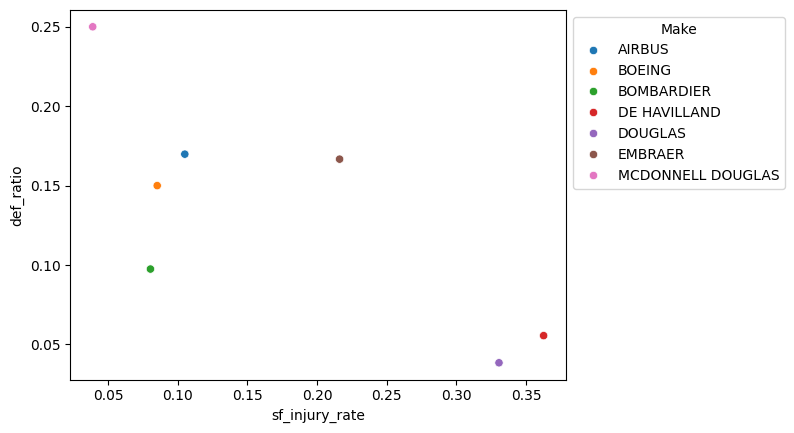

In [104]:
lp_sf_df = aviation_cdf.groupby('Make')['sf_injury_rate'].mean().to_frame()
#print(len(spsf_df))
lpsf_df = lp_sf_df.reset_index()
#print(lpsf_df)


lp_combined = largeplane_combined_grouped2.merge(lpsf_df, left_on='Make',right_on='Make', how='left')
#print(lp_combined)
ax_large = sns.scatterplot(x='sf_injury_rate',y='def_ratio', data=lp_combined, hue='Make')
sns.move_legend(ax_large, "upper left", bbox_to_anchor=(1, 1))

In [90]:
"""
### Discussion

-Large planes seem to have a higher destruction rate than smaller planes.

-Planes overall seem to have a pretty similar serious/fatal injury rate, however large planes have a higher potential for more catastrophic injuries

-There is a trend for both large and small planes where the rate of destruction goes up, the potential for higher risk of serious/fatal injury also goes up

### Recommendation
Large Plane based on the data given seems to be the plane company Bombardier which has the smallest Destruction rate and lowest Serious/Fatal Injury Rate

Small Planes have three good choices.  The Injury rate and destruction rate are all comporable.  The top 3 listed in order of best combined destruction and injury rate are below.
1)Bombardier
2)Boeing
3)Airbus

"""

'\n### Discussion\n\n-Large planes seem to have a higher destruction rate than smaller planes.\n\n-Planes overall seem to have a pretty similar serious/fatal injury rate, however large planes have a higher potential for more catastrophic injuries\n\n-There is a trend for both large and small planes where the rate of destruction goes up, the potential for higher risk of serious/fatal injury also goes up\n\n### Recommendation\nLarge Plane based on the data given seems to be the plane company Bombardier which has the smallest Destruction rate and lowest Serious/Fatal Injury Rate\n\nSmall Planes have three good choices.  The Injury rate and destruction rate are all comporable.  The top 3 listed in order of best combined destruction and injury rate are below.\n1)Bombardier\n2)Boeing\n3)Airbus\n\n'

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

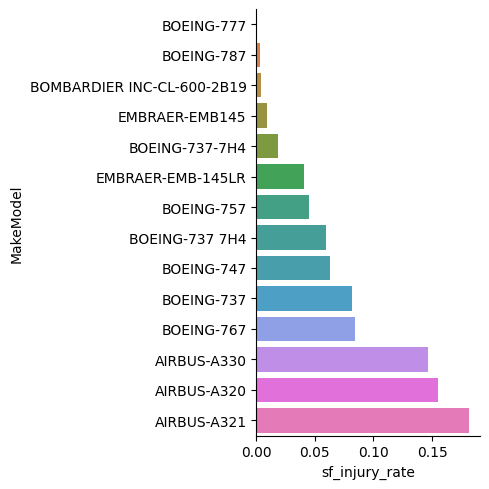

In [91]:
#smallplanes_grouped_sf2
#largeplanes_grouped_sf2

#Get all large plane make model combos with the counts > 10
lp_app_df2 = largeplanes_df['MakeModel'].value_counts().to_frame()
lp_app_df3 = lp_app_df2.reset_index()
lp_app_df = lp_app_df3[lp_app_df3['count'] >= 10]
lp_app_df

#Get the serious/fatal injury rate and merge with table above and sort by injury rate.  Plot all in a horizontal bar chart
lp_mm_df2 = aviation_cdf.groupby('MakeModel')['sf_injury_rate'].mean().to_frame()
lp_mm_df = lp_mm_df2.reset_index()
lp_mm_combined = lp_mm_df.merge(lp_app_df, left_on='MakeModel', right_on='MakeModel', how='inner')
lp_mm_combined_sort = lp_mm_combined.sort_values(by='sf_injury_rate')
lp_mm_topten = lp_mm_combined_sort
lp_mm_topten

sns.catplot(x='sf_injury_rate', y='MakeModel',data=lp_mm_topten, hue='MakeModel', kind='bar')

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

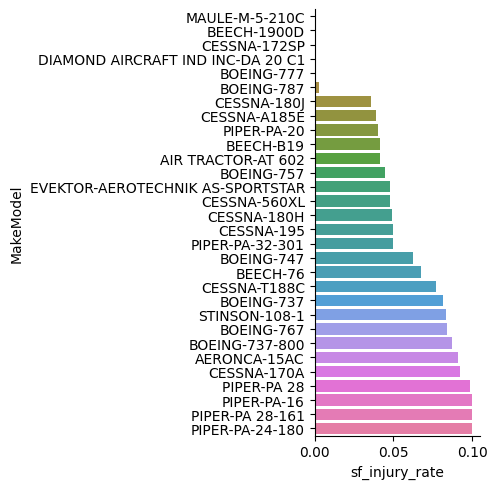

In [92]:
#smallplanes_grouped_sf2
#largeplanes_grouped_sf2

#GEt the make & Model combination field and have the counts of how many times they appear
sp_app_df2 = smallplanes_df['MakeModel'].value_counts().to_frame()
sp_app_df3 = sp_app_df2.reset_index()
#Filter for top 10 appearances
sp_app_df = sp_app_df3[sp_app_df3['count'] >= 10]
sp_app_df

#Get the injury rate for all Make Model combos
sp_mm_df2 = aviation_cdf.groupby('MakeModel')['sf_injury_rate'].mean().to_frame()
sp_mm_df = sp_mm_df2.reset_index()

#Merge the two together
sp_mm_combined = sp_mm_df.merge(sp_app_df, left_on='MakeModel', right_on='MakeModel', how='inner')

#Sort by injury rate
sp_mm_combined_sort = sp_mm_combined.sort_values(by='sf_injury_rate')
#grab top 30
sp_mm_topten = sp_mm_combined_sort.head(30)
#sp_mm_topten = sp_mm_combined_sort.tail(30)
sp_mm_topten


#plot of top 40
sns.catplot(x='sf_injury_rate', y='MakeModel',data=sp_mm_topten, hue='MakeModel', kind='bar')

Text(0.5, 1.0, 'All Small Plane Fatal/Serious Injury Rate')

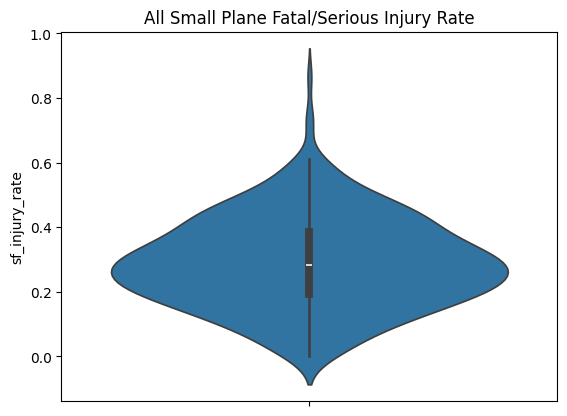

In [93]:
#Violin plot of all small airplane serious/fatal injury rate
sns.violinplot(data=sp_mm_combined_sort['sf_injury_rate']).set_title("All Small Plane Fatal/Serious Injury Rate")

Text(0.5, 1.0, 'All Large Plane Fatal/Serious Injury Rate')

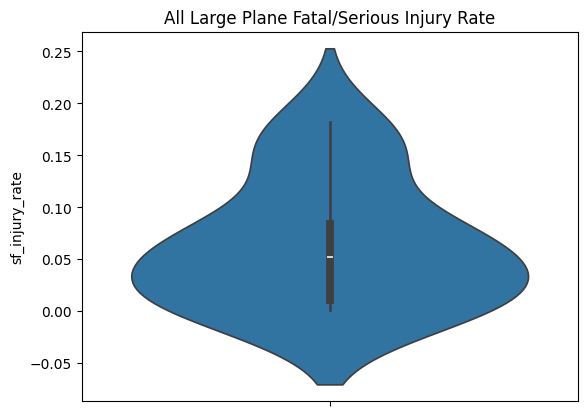

In [94]:
#Violin plot of all large airplanes Injury Rate
sns.violinplot(data=lp_mm_combined_sort['sf_injury_rate']).set_title("All Large Plane Fatal/Serious Injury Rate")

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [95]:
"""
DISCUSSION

-Large planes really come down to a few Makes.  Boeing and Airbus are the two main Large Plane producers and therefor cover the majority of data.  Of those, Boeing has the lower serious injury rate for all Models compared to Airbus.

-Small planes have many more makes associated with them.  Many more accidents to get data from too. That being said, Piper seems to be one of the Makes that have the highest serious/fatal injury rate for their plane types.  Cessna and Boeing seem to have the best make for low risk of injury

"""

'\nDISCUSSION\n\n-Large planes really come down to a few Makes.  Boeing and Airbus are the two main Large Plane producers and therefor cover the majority of data.  Of those, Boeing has the lower serious injury rate for all Models compared to Airbus.\n\n-Small planes have many more makes associated with them.  Many more accidents to get data from too. That being said, Piper seems to be one of the Makes that have the highest serious/fatal injury rate for their plane types.  Cessna and Boeing seem to have the best make for low risk of injury\n\n'

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

<Axes: xlabel='Weather.Condition', ylabel='sf_injury_rate'>

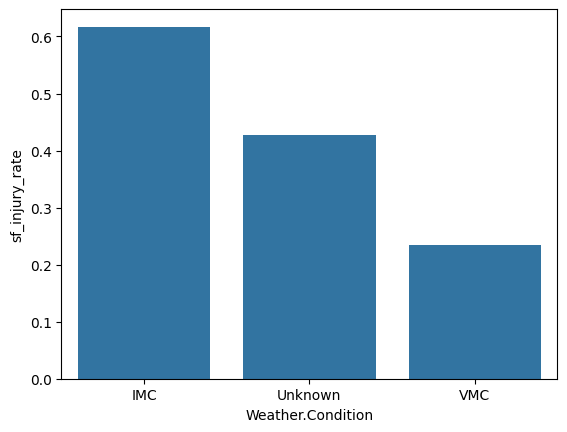

In [96]:
#group by weather Condition - sum total passengers, fatal/erious injuries
wc_df = aviation_cdf.groupby('Weather.Condition')['sf_injury_rate'].mean()
sns.barplot(wc_df)

In [97]:
###Discussion
"""
More than double the chance of Serious or Fatal injury happens in incliment weather when pilots rely on instruments to see their surroundings rather than being able to visually see. 
"""

'\nMore than double the chance of Serious or Fatal injury happens in incliment weather when pilots rely on instruments to see their surroundings rather than being able to visually see. \n'

<Axes: xlabel='Number.of.Engines', ylabel='sf_injury_rate'>

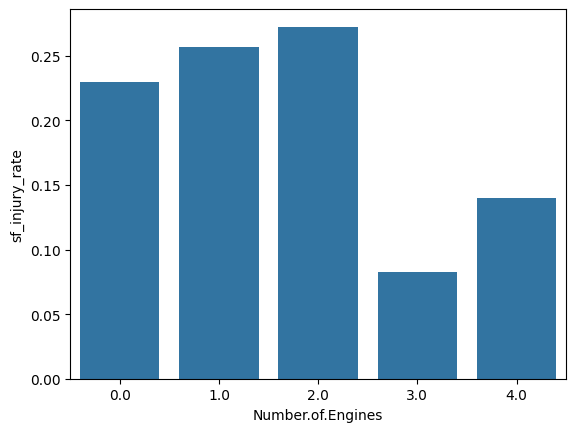

In [98]:
#Number of engines - Group by number of engines, sum total passengers, fatal/serious injuries
engines_df = aviation_cdf.groupby('Number.of.Engines')['sf_injury_rate'].mean()
engines_df
sns.barplot(engines_df)

In [99]:
### Discussion
"""
- The rist of having a plane with fewer engines increases the chance of fatal or serious injury by almost double.  Having 3 or more engines makes the risk of serious or fatal injury much lower
"""

'\n- The rist of having a plane with fewer engines increases the chance of fatal or serious injury by almost double.  Having 3 or more engines makes the risk of serious or fatal injury much lower\n'

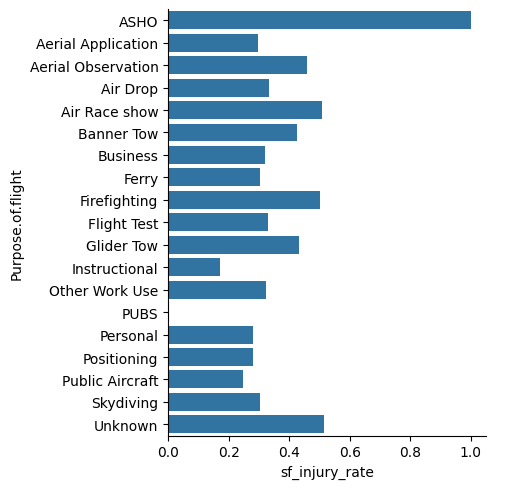

In [100]:
#Calculate SErious/Fatal injury rate based on the purpose of the flight
pof_df = aviation_cdf.groupby('Purpose.of.flight')['sf_injury_rate'].mean().to_frame()
pof_df2 = pof_df.reset_index()
#print(pof_df2)
sns.catplot(y='Purpose.of.flight',x='sf_injury_rate',data=pof_df2, kind='bar')

In [101]:
### Discussion
"""
More serious or fatal injuries happen during non conventional airplane experiences such as air race shows or firefighting.  Normal Business/Public flights seem to have a less fatal or serious injury risk as pilots are not doing tricky manuevers.

Look at next chart for more on why

"""

'\nMore serious or fatal injuries happen during non conventional airplane experiences such as air race shows or firefighting.  Normal Business/Public flights seem to have a less fatal or serious injury risk as pilots are not doing tricky manuevers.\n\nLook at next chart for more on why\n\n'

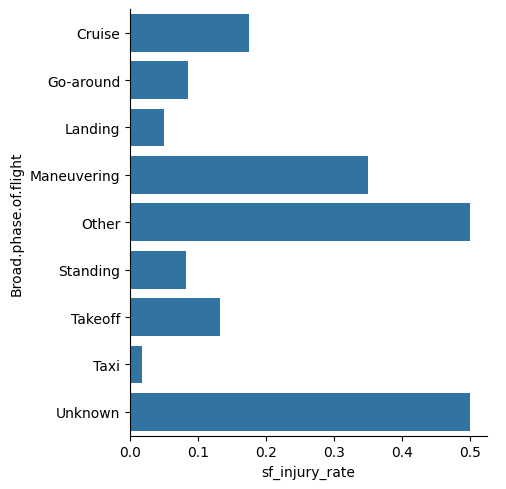

In [102]:
#Calculate Phase of Flight average serious/Fatal Injury Rate
phase_df = aviation_cdf.groupby('Broad.phase.of.flight')['sf_injury_rate'].mean().to_frame()
bpof_df = phase_df.reset_index()
sns.catplot(y='Broad.phase.of.flight', x='sf_injury_rate', data=bpof_df, kind='bar')

In [103]:
### Discussion
"""
For data that we have, it is clear that the Phase of flight that is most risky for serious or fatal injury is during maneuvering which is done more often in Air shows and/or firefighting, exc.  

Masneuvering is more than double any other known phase of flight for rate of serious/fatal injury
"""

'\nFor data that we have, it is clear that the Phase of flight that is most risky for serious or fatal injury is during maneuvering which is done more often in Air shows and/or firefighting, exc.  \n\nMasneuvering is more than double any other known phase of flight for rate of serious/fatal injury\n'